In [1]:
!pwd

/content


In [2]:
!git clone https://github.com/chulminkw/DLCV.git

Cloning into 'DLCV'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (71/71), done.
Receiving objects: 100% (234/234), 142.72 MiB | 42.68 MiB/s, done.
remote: Total 234 (delta 32), reused 0 (delta 0), pack-reused 159
Resolving deltas: 100% (89/89), done.


In [4]:
!ls -al DLCV

total 11016
drwxr-xr-x 7 root root    4096 Apr  9 09:53  .
drwxr-xr-x 1 root root    4096 Apr  9 09:53  ..
drwxr-xr-x 2 root root    4096 Apr  9 09:53  colab_tf115_modify_files
drwxr-xr-x 6 root root    4096 Apr  9 09:53  data
drwxr-xr-x 8 root root    4096 Apr  9 09:53  Detection
-rw-r--r-- 1 root root 6567662 Apr  9 09:53  DLCV_Colab_SrcCode_20200905.zip
drwxr-xr-x 8 root root    4096 Apr  9 09:53  .git
-rw-r--r-- 1 root root 2063693 Apr  9 09:53  labelimg.pptx
-rw-r--r-- 1 root root 2612271 Apr  9 09:53 '구글클라우드 가입하기.pdf'
-rw-r--r-- 1 root root     142 Apr  9 09:53  README.md
drwxr-xr-x 3 root root    4096 Apr  9 09:53  Segmentation


# 입력 이미지로 사용될 이미지 보기
- OpenCV의 Pretrained 모델들은 커스텀 데이터로 재학습이 불가하고 Inference만 가능

In [29]:
%cd /content/DLCV/data/image/
!wget https://img2.10bestmedia.com/Images/Photos/379272/GettyImages-104489865_54_990x660.jpg
!ls -lia

/content/DLCV/data/image
--2021-04-09 10:28:02--  https://img2.10bestmedia.com/Images/Photos/379272/GettyImages-104489865_54_990x660.jpg
Resolving img2.10bestmedia.com (img2.10bestmedia.com)... 151.101.2.62, 151.101.66.62, 151.101.130.62, ...
Connecting to img2.10bestmedia.com (img2.10bestmedia.com)|151.101.2.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95316 (93K) [image/jpeg]
Saving to: ‘GettyImages-104489865_54_990x660.jpg’

GettyImages-1044898 100%[===================>]  93.08K  --.-KB/s    in 0.003s  

2021-04-09 10:28:02 (33.0 MB/s) - ‘GettyImages-104489865_54_990x660.jpg’ saved [95316/95316]

total 4236
4096199 drwxr-xr-x 2 root root    4096 Apr  9 10:28 .
4096198 drwxr-xr-x 6 root root    4096 Apr  9 09:53 ..
4090454 -rw-r--r-- 1 root root   30102 Apr  9 09:53 audrey01.jpg
4090455 -rw-r--r-- 1 root root   76279 Apr  9 09:53 baseball01.jpg
4090456 -rw-r--r-- 1 root root  383118 Apr  9 09:53 beatles01.jpg
4090457 -rw-r--r-- 1 root root   52900 Apr 

image shape: (633, 806, 3)


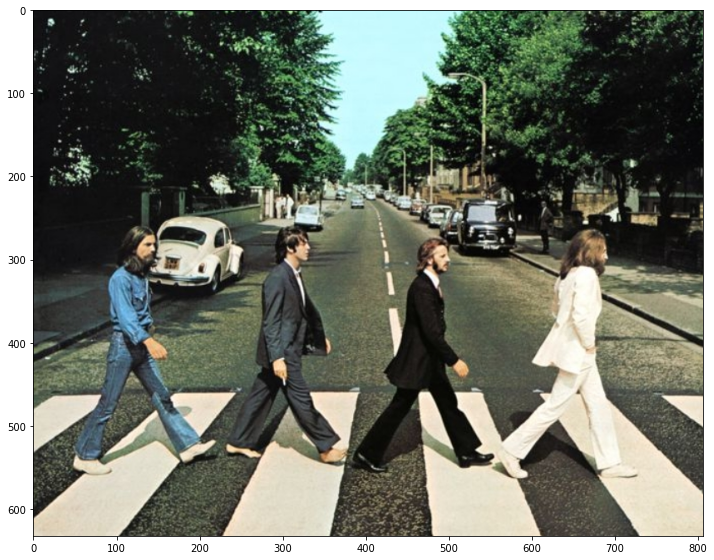

In [11]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

default_dir = '/content/DLCV'
# BGR
img = cv2.imread(os.path.join(default_dir,
                              'data/image/beatles01.jpg'))
# Convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('image shape:', img_rgb.shape)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()

# Tensorflow에서 Pretrained된 Object Detection 모델과 config 파일 다운로드

In [14]:
!mkdir /content/DLCV/Detection/fast_rcnn/pretrained
%cd /content/DLCV/Detection/fast_rcnn
!ls

/content/DLCV/Detection/fast_rcnn
OpenCV_FasterRCNN_ObjectDetection.ipynb
pretrained
Tensorflow_FasterRCNN_ObjectDetection.ipynb


In [15]:
%cd /content/DLCV/Detection/fast_rcnn/pretrained

/content/DLCV/Detection/fast_rcnn/pretrained


In [16]:
# pretrained된 faster rcnn 모델과 config용 다운로드 받기
!echo "##### downloading pretrained weight file and config pbtxt file"
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt


##### downloading pretrained weight file and config pbtxt file
--2021-04-09 10:02:14--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.62.128, 2607:f8b0:4004:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.62.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

faster_rcnn_resnet5 100%[===================>] 363.69M   170MB/s    in 2.1s    

2021-04-09 10:02:16 (170 MB/s) - ‘faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]

--2021-04-09 10:02:16--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting 

In [17]:
# tar 파일 압축풀기
!echo "##### uncompressing tar file"
!tar -xvf faster_rcnn*.gz

# config용 pbtxt 파일의 이름을 graph.pbtxt로 변경
# echo "renaming pbtxt file name"
!mv /content/DLCV/Detection/fast_rcnn/pretrained/faster_rcnn*.pbtxt /content/DLCV/Detection/fast_rcnn/pretrained/faster_rcnn_resnet50_coco_2018_01_28/graph.pbtxt

# tar 파일 삭제
!echo "##### deleting tar file" 
!rm *.gz

# weight파일과 config 파일이 있는 pretrained/faster_rcnn_resnet50_coco_2018_01_28 디렉토리 내부 확인 
!echo "##### check out pretrained/faster_rcnn_resnet50_coco_2018_01_28"
!ls /content/DLCV/Detection/fast_rcnn/pretrained/faster_rcnn_resnet50_coco_2018_01_28

##### uncompressing tar file
faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb
##### deleting tar file
##### check out pretrained/faster_rcnn_resnet50_coco_2018_01_28
checkpoint		   model.ckpt.data-00000-of-00001  pipeline.config
frozen_inference_graph.pb  model.ckpt.index		   saved_model
graph.pbtxt		   model.ckpt.meta


## Pretrained 모델 로딩
- ``cv2.dnn.readNetFromTensorflow()`` 사용
- 인자에는 모델과 config 파일 추가

In [21]:
default_rcnn_dir = '/content/DLCV/Detection/fast_rcnn'
cv_net = cv2.dnn.readNetFromTensorflow(os.path.join(default_rcnn_dir, 'pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb'),
                                       os.path.join(default_rcnn_dir, 'pretrained/faster_rcnn_resnet50_coco_2018_01_28/graph.pbtxt'))
print('cv_net type:', type(cv_net))
print(cv_net)

cv_net type: <class 'cv2.dnn_Net'>
<dnn_Net 0x7f06e77a0990>


In [22]:
# coco 데이터 세트의 클래스 id별 클래스명을 지정해주어야 함
# 그런데 모델 별로 dict가 다르기 때문에 penCV DNN으로 Faster RCNN Object Detection 실습 01 슬라이드 참조!
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

# 이미지를 전처리 후 Pretrained 모델에 입력시킨 다음 Object Detection 결과 살펴보기

In [26]:
# Faster RCNN은 원본 이미지 좌표가 0~1사이의 값으로 resize(scaling)되어서 입력됨
# 그러므로 원본의 bounding box 좌표를 복원하기 위해 원본 이미지의 너비, 높이 활용해 계산
height = img.shape[0]
width = img.shape[1]
# rectangle()로 바운딩 박스 시각화 시 inplace가 되기 때문에 이미지 copy 시켜놓기
draw_img = img.copy()

# Pretrained Model로 원본 이미지 입력시키기
# swapRB: OpenCV의 imread로 한 것이 BGR형태이기 때문에 R과 B를 swap시키기!
cv_net.setInput(cv2.dnn.blobFromImage(img, swapRB=True, crop=False)) 
# Pretrained Model로 Object Detection 수행
cv_out = cv_net.forward()
print('cv_out type:', type(cv_out))
print('cv_out shape:', cv_out.shape)

cv_out type: <class 'numpy.ndarray'>
cv_out shape: (1, 1, 100, 7)


person: 0.9998
person: 0.9996
person: 0.9993
person: 0.9970
person: 0.8995
car: 0.8922
car: 0.7602
car: 0.7415
car: 0.6930
car: 0.6918
car: 0.6896
car: 0.6717
car: 0.6521
car: 0.5730
car: 0.5679
car: 0.5261
car: 0.5012


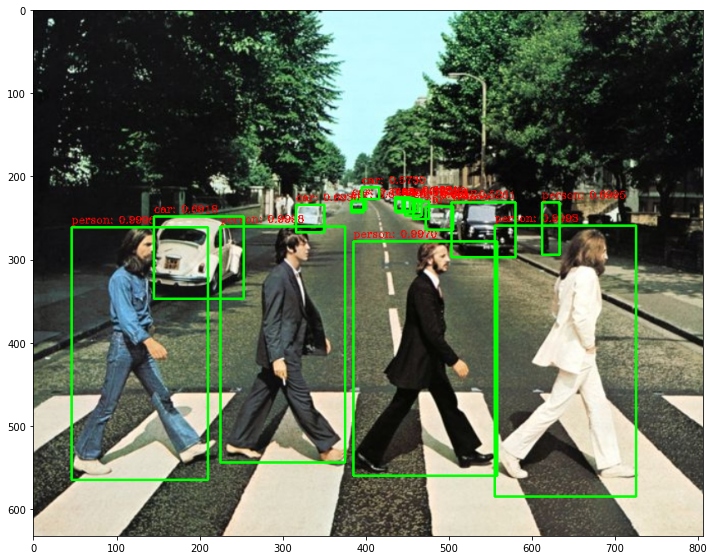

In [27]:
# 반환된 cv_out shape를 보면 (1, 1, 100, 7)로 되어 있음
# 1, 1 : 입력된 이미지가 한개라서!
# 100 : 그려진 바운딩 박스가 100개라는 것
# 7: 특정 오브젝트의 좌표값들(4개), class_id, object_score가 들어가 있음

green_color = (0, 255, 0)  # 바운딩 박스 색깔
red_color = (0, 0, 255)    # 바운딩 박스에 들어갈 텍스트 색깔

# 반환된 결과값 중 (100, 7)에 들어있는 데이터 = 100개의 바운딩 박스에 대한 정보
for detection in cv_out[0,0,:,:]:
  score = float(detection[2]) # score는 3번째에 있음
  class_id = int(detection[1]) # class_id는 2번째에 있음
  # detected된 객체들의 score가 0.5 이상인 것들만 추출
  if score > 0.5:
    left = int(detection[3] * width)  # 4,5번째에 좌상단 좌표가 존재
    top = int(detection[4] * height)
    right = int(detection[5] * width)  #6,7번째에 우하단 좌표가 존재
    bottom = int(detection[6] * height)
    # label - name dict에서 특정 class_id에 맞은 클래스 이름 변경
    caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
    print(caption)

    # 바운딩 박스에 caption 텍스트 넣기
    cv2.rectangle(draw_img, (left, top), (right, bottom),
                  color=green_color, thickness=2)
    cv2.putText(draw_img, caption, (left, top-5),
                cv2.FONT_HERSHEY_COMPLEX, 0.4, red_color, 1)

# draw_img는 img와 동일한 형태로 BGR로 입력되어 있기 때문에 RGB로 변형
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

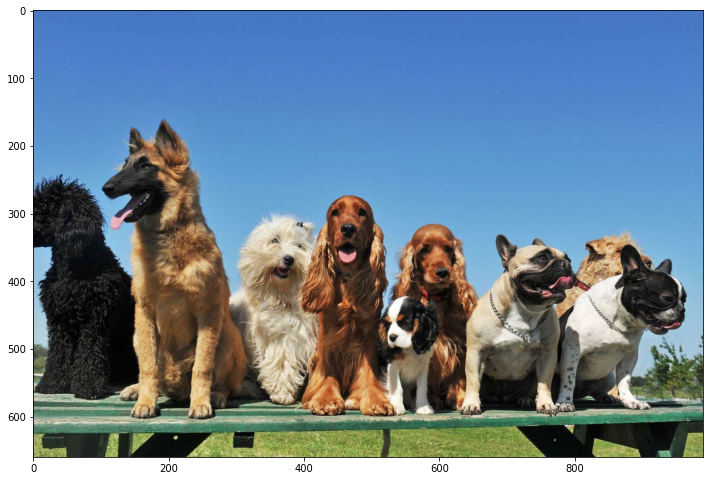

In [31]:
# 다른 사진으로 연습해보기
import cv2
import matplotlib.pyplot as plt
import os

default_dir = '/content/DLCV'
img = cv2.imread(os.path.join(default_dir, 'data/image/GettyImages-104489865_54_990x660.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

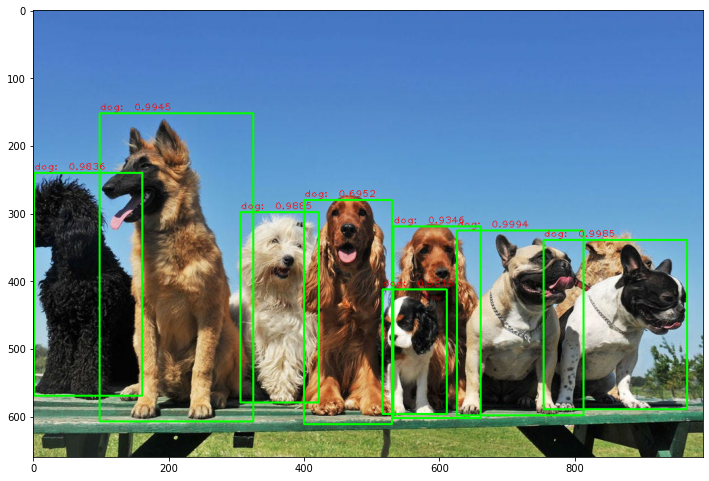

In [38]:
# Pretrained Faster RCNN 모델로 위 사진을 Object Detection 시키기
height = img.shape[0]
width = img.shape[1]

draw_img = img.copy()
# Pretrained Model에 이미지 입력
cv_net.setInput(cv2.dnn.blobFromImage(img, swapRB=True, crop=False))
# 이미지에 대해 Object Detection 수행
cv_out = cv_net.forward()

# Object Detection한 결과에 대해 바운딩 박스 시각화
green_color = (0, 255, 0)
red_color = (0, 0, 255)

for detection in cv_out[0,0,:,:]:
  score = float(detection[2])  # score는 3번째 값에!
  class_id = int(detection[1]) # class_id는 2번째 값에!
  if score > 0.5:
    # 0.5가 넘는 바운딩 박스들 시각화 하기
    left = int(detection[3] * width)
    top = int(detection[4] * height)
    right = int(detection[5] * width)
    bottom = int(detection[6] * height)
    # 텍스트 캡션
    caption = f"{labels_to_names_0[class_id]}: {score: .4f}"
    # draw_img에 바운딩 박스 시각화
    cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_color, thickness=2)
    cv2.putText(draw_img, caption, (left, top-4), cv2.FONT_HERSHEY_PLAIN, 1, red_color, 1)

# draw_img는 OpenCV의 imread한 객체로 BGR형태임 -> RGB로 변경!
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

# Video Object Detection 수행

In [39]:
# 코랩 버전은 아래 코드를 이용합니다.
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/DLCV/data/video/John_Wick_small.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

- ``VideoCapture()``를 이용해 Video를 프레임별로 캡쳐하도록 설정
- ``VideoCapture()``를 이용해 Video 프레임 크기 및 FPS 설정
- ``VideoWriter()``를 이용해 인코딩 코덱 설정 및 영상 저장(write) 설정

In [40]:
import os
default_dir = '/content/DLCV'
video_input_path = os.path.join(default_dir, 'data/video/John_Wick_small.mp4')
# linux에서 video output의 확장자는 반드시 avi 로 설정 필요. 
video_output_path = os.path.join(default_dir, 'data/output/John_Wick_small_cv01.avi')

cap = cv2.VideoCapture(video_input_path) # 입력 비디오 경로 입력
codec = cv2.VideoWriter_fourcc(*'XVID') # 코덱 설정

# 비디오에서 추출하는 프레임 사이즈 얻기
vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
            round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
# 비디오에서의 FPS 수치 측정
vid_fps = cap.get(cv2.CAP_PROP_FPS)
# 비디오를 Object Detection한 결과를 저장할 아웃풋 경로 입력 - 경로, 코덱, FPS, 사이즈 입력
vid_writer = cv2.VideoWriter(video_output_path,
                             codec, vid_fps,
                             vid_size)
# 비디오의 프레임 개수 얻기
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("총 Frame 개수:", frame_cnt)



총 Frame 개수: 58


In [41]:
import time

# 프레임별로 loop를 돌면서 프레임 당 Object Detection 수행
green_color = (0, 255, 0)
red_color = (0, 0, 255)

while True:
  hasFrame, imgFrame = cap.read()  # 한 프레임씩 읽어들이기 - 프레임 여부(T/F), 프레임 데이터 얻음
  if not hasFrame: # False이면!
    print("더 이상 처리할 프레임이 없습니다!")
    break
  # Fast RCNN은 입력 프레임(이미지)를 0~1사이값으로 스케일링하기 때문에 원본 프레임 너비, 크기 더해주기
  height = imgFrame.shape[0]
  width = imgFrame.shape[1]
  # Pretrained Model에 한 프레임씩 입력이미지로 넣기
  cv_net.setInput(cv2.dnn.blobFromImage(imgFrame, swapRB=True, crop=False))
  
  start = time.time()
  # 한 프레임당 Object Detection 수행
  cv_out = cv_net.forward()
  frame_idx = 0
  # 한 프레임당 detect된 객체들 추출해서 시각화
  for detection in cv_out[0, 0, :, :]:
    score = float(detection[2])
    class_id = int(detection[1])
    if score > 0.5:
      left = int(detection[3] * width)
      top = int(detection[4] * height)
      right = int(detection[5] * width)
      bottom = int(detection[6] * height)
      caption = f"{labels_to_names_0[class_id]}: {score :.4f}"
      # imgFrame에 rectangle()로 바운딩 박스 씌우기
      cv2.rectangle(imgFrame, (left, top), (right, bottom),
                    color=green_color, thickness=2)
      cv2.putText(imgFrame, caption, (left, top-4),
                  cv2.FONT_HERSHEY_PLAIN, 0.4, red_color, 1)
  # 한 프레임당 디텍션 수행 시간
  print("1개의 프레임당 디텍션 수행시간:", time.time()-start, '초')
  # 한 프레임당 디텍션을 수행하고 VideoWriter 수행
  vid_writer.write(imgFrame)

# 모든 프레임 디텍션 수행후 release
vid_writer.release()
cap.release()

1개의 프레임당 디텍션 수행시간: 6.513529300689697 초
1개의 프레임당 디텍션 수행시간: 6.410611629486084 초
1개의 프레임당 디텍션 수행시간: 6.477866888046265 초
1개의 프레임당 디텍션 수행시간: 6.433290958404541 초
1개의 프레임당 디텍션 수행시간: 6.390744209289551 초
1개의 프레임당 디텍션 수행시간: 6.325022220611572 초
1개의 프레임당 디텍션 수행시간: 6.479172229766846 초
1개의 프레임당 디텍션 수행시간: 6.428973913192749 초
1개의 프레임당 디텍션 수행시간: 6.288747787475586 초
1개의 프레임당 디텍션 수행시간: 6.2820024490356445 초
1개의 프레임당 디텍션 수행시간: 6.331369876861572 초
1개의 프레임당 디텍션 수행시간: 6.284107685089111 초
1개의 프레임당 디텍션 수행시간: 6.342898607254028 초
1개의 프레임당 디텍션 수행시간: 6.422595262527466 초
1개의 프레임당 디텍션 수행시간: 6.287614107131958 초
1개의 프레임당 디텍션 수행시간: 6.44581937789917 초
1개의 프레임당 디텍션 수행시간: 6.437815427780151 초
1개의 프레임당 디텍션 수행시간: 6.399363994598389 초
1개의 프레임당 디텍션 수행시간: 6.329564094543457 초
1개의 프레임당 디텍션 수행시간: 6.270885229110718 초
1개의 프레임당 디텍션 수행시간: 6.284221649169922 초
1개의 프레임당 디텍션 수행시간: 6.275469541549683 초
1개의 프레임당 디텍션 수행시간: 6.343237638473511 초
1개의 프레임당 디텍션 수행시간: 6.398884296417236 초
1개의 프레임당 디텍션 수행시간: 6.31803560256958 초
1개의 프레임당 디텍션 수행시간: 6.40428

In [42]:
## colab 버전은 영상 파일을 google drive에서 download 해야 합니다. 이를 위해 google drive를 colab에 mount 수행. 
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [50]:
!cp /content/DLCV/data/output/John_Wick_small_cv01.avi '/content/gdrive/My Drive/Colab Notebooks/Night_Day_Chase_output_fasterRCNN.avi'